<a href="https://colab.research.google.com/github/miguelsmachado/Aproching_any_ML_probloem/blob/main/AAMLP_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Antes de falarmos sobre Cross-validation, é muito importante entendermos o significado de `overfitting`.

Overfitting é quando um modelo se adequa perfeitamente nos dados de treino e muito mal nos dados de teste.

Para entendermos melhor o que está ocorrendo, vamos usar um data set que trata sobre a nota dos vinhos baseado em sua características.

In [1]:
import pandas as pd

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/miguelsmachado/Aproching_any_ML_probloem/main/datasets/winequality-red.csv", sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Vamos dar uma olhada nos valores da coluna quality:

In [4]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

Para facilitar o entendimento, vamos trocar esses 6 valores por valores de 0 a 5

In [5]:
quality_map = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.quality = df.quality.map(quality_map)

df.quality.unique()

array([2, 3, 4, 1, 5, 0])

### Separando em dados de treino e teste

1º Vamos embaralhar o dataFrame;

2º Já vamos reindexar o DataFrame:

In [6]:
# Ao usarmos o comando sample, temos que escolher quantos dados serão retornados na amostra.
# Podemos fazer isso com n= e passarmos o valor exato ou usamos o parâmetro
# frac= e passamos a fração que queremos. Como queremos o DataSet todo, vamos usar
# frac = 1

# O parâmetro drop= recebe um bool e retorna ou não o antigo índice dentro do dataframe

df = df.sample(frac=1).reset_index(drop = True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.2,1.33,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,2
1,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,3
2,6.4,0.79,0.04,2.2,0.061,11.0,17.0,0.99588,3.53,0.65,10.4,3
3,12.0,0.39,0.66,3.0,0.093,12.0,30.0,0.99960,3.18,0.63,10.8,4
4,7.1,0.36,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4,2


3º Separando em X e y

In [7]:
X = df.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.2,1.33,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9
1,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3
2,6.4,0.79,0.04,2.2,0.061,11.0,17.0,0.99588,3.53,0.65,10.4
3,12.0,0.39,0.66,3.0,0.093,12.0,30.0,0.99960,3.18,0.63,10.8
4,7.1,0.36,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4


In [8]:
y = df.quality
y.head()

0    2
1    3
2    3
3    4
4    2
Name: quality, dtype: int64

4º Separando em treino e teste:

In [9]:
X_train = X.iloc[:1000]
X_test = X.iloc[1000:]

y_train = y.iloc[:1000]
y_test = y.iloc[1000:]

(2ª forma de fazer)

4º Separando em treino e teste:


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.33, random_state=42)

## Criando o classificador

In [12]:
from sklearn import tree

Inicialmente, iremos usar um Decision Tree Classifier com profundidade de 3

In [13]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Verificando as Predições

In [15]:
train_predictions = clf.predict(X_train)

test_predictions = clf.predict(X_test)

### Verificando a acurácia

In [16]:
from sklearn import metrics

Acurácia de treino

In [17]:
train_accuracy = metrics.accuracy_score(y_train, train_predictions)
train_accuracy

0.606

Acurácia de teste

In [18]:
test_accuracy = metrics.accuracy_score(y_test, test_predictions)
test_accuracy

0.5575959933222037

### Teste variados com diferentes valores para o `maxdepth`

In [19]:
train_accuracies = [0.5]
test_accuracies = [0.5]
index_accuracies = [0]

In [20]:
for depth in range(1, 30):
  #criando o classificador
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  
  #treinando o classificador
  clf.fit(X_train, y_train)

  # realizando as predições de treino e teste
  train_predictions = clf.predict(X_train)
  test_predictions = clf.predict(X_test)

  # calculando as acurácias
  train_accuracy = metrics.accuracy_score(y_train, train_predictions)
  test_accuracy = metrics.accuracy_score(y_test, test_predictions)

  # adicionando os valores nas listas
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
  index_accuracies.append(depth)


Realizando o plot:

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_palette("Dark2")
sns.set_style("darkgrid")

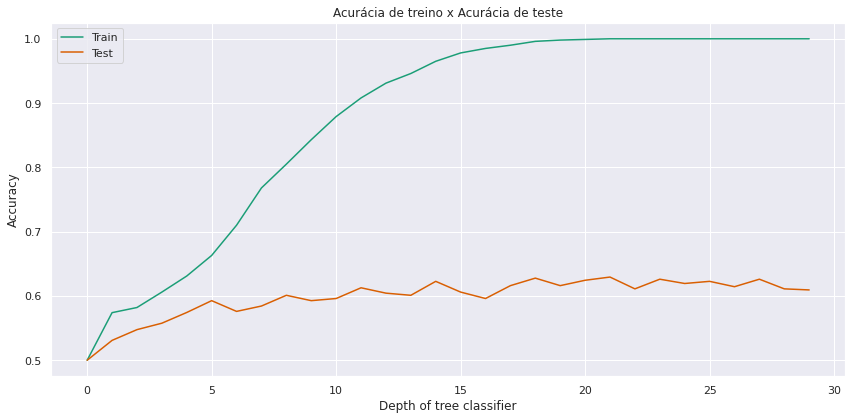

In [22]:
ax = sns.lineplot(x=index_accuracies, y=train_accuracies, label='Train')
ax = sns.lineplot(x=index_accuracies, y=test_accuracies, label='Test')

ax.figure.set_size_inches(12,6)
ax.set_title("Acurácia de treino x Acurácia de teste")
ax.set_xlabel("Depth of tree classifier")
ax.set_ylabel("Accuracy")
ax.legend()

plt.tight_layout()

Aqui podemos ver perfeitamente como a acurrácia de treino vai melhorando cada vez mais quando aumentamos a profundidade da árvore. Mas em contrapartida, a mesma otimização não ocorre nos dados de teste.

Isso é o **overfitting**

# Cross-validation

Para solucionarmos esse problema, vamos usar o cross-validation. Essa técnica divide os dados em vários grupo e aplica os treinos em testes nesses grupos.

Dessa forma, todos os dados são utilizados tanto para treino como para teste.

<center><img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" height="300px"></center>

## **Kfold** "normal"

### Criando os *folds*

Importando a biblioteca model selection

In [23]:
from sklearn import model_selection

Resetando os valores para X e y:

In [24]:
X = df.drop('quality', axis=1)
y = df.quality

In [25]:
X['kfold'] = -1
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kfold
0,8.2,1.33,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,-1
1,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,-1
2,6.4,0.79,0.04,2.2,0.061,11.0,17.0,0.99588,3.53,0.65,10.4,-1
3,12.0,0.39,0.66,3.0,0.093,12.0,30.0,0.99960,3.18,0.63,10.8,-1
4,7.1,0.36,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4,-1


Fazendo a separação na proporção que queremos que o Kfold divida os dados.

Nesse caso, queremos que divida em 5 partes, sendo 4 para treino e 1 para validação

In [26]:
kf = model_selection.KFold(n_splits=5)

Atribuindo o "número do fold" que o modelo criou para entrada na coluna `kfold`

In [27]:
# a função split() irá retornar um objeto que pode ser listado (list(kf.split()))
# o kf.split() retorna os splits gerados pelo kfold, nesse caso, 5
# cada um deles terá, na primeira posicão quais entradas são de treino
# e na segunda posição quais são de teste

for fold, (trn_, val_) in enumerate(kf.split(X)):
  X.loc[val_, 'kfold'] = fold

Vamos embaralhar o dataFrame para podermos ver que os valores de 0 a 4 (os 5 splits) foram distribuídos na coluna `kfold`

In [28]:
X.sample(frac=1).head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kfold
1208,7.2,0.635,0.07,2.6,0.077,16.0,86.0,0.99748,3.51,0.54,9.7,3
207,10.0,0.480,0.24,2.7,0.102,13.0,32.0,1.00000,3.28,0.56,10.0,0
157,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,0
1513,12.0,0.380,0.56,2.1,0.093,6.0,24.0,0.99925,3.14,0.71,10.9,4
414,7.7,0.705,0.10,2.6,0.084,9.0,26.0,0.99760,3.39,0.49,9.7,1
320,9.9,0.590,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8,1
895,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,2
1277,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0,3
22,7.2,0.500,0.18,2.1,0.071,12.0,31.0,0.99761,3.52,0.72,9.6,0
978,7.8,0.550,0.00,1.7,0.070,7.0,17.0,0.99659,3.26,0.64,9.4,3


## **Stratified Kfold**

In [29]:
from sklearn import model_selection

Resetando os valores de X e Y

In [30]:
X = df.drop('quality', axis=1)
y = df.quality

In [31]:
X['s_kfold'] = -1
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,s_kfold
0,8.2,1.33,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,-1
1,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,-1
2,6.4,0.79,0.04,2.2,0.061,11.0,17.0,0.99588,3.53,0.65,10.4,-1
3,12.0,0.39,0.66,3.0,0.093,12.0,30.0,0.99960,3.18,0.63,10.8,-1
4,7.1,0.36,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4,-1


In [32]:
s_kf = model_selection.StratifiedKFold(n_splits=5)

In [33]:
for fold, (trn_, val_) in enumerate(s_kf.split(X, y)):
  X.loc[val_, 's_kfold'] = fold

### Comparando os dados de y com as divisões do `Statified_kfold()`

Valores de y em cada fold

In [34]:
for i in range(5):
  dtrn_s_kfold = list(s_kf.split(X, y))[i][0]
  print(y.loc[dtrn_s_kfold].value_counts().sort_index().to_list())

[8, 42, 544, 511, 159, 15]
[8, 43, 545, 510, 159, 14]
[8, 43, 545, 510, 159, 14]
[8, 42, 545, 510, 160, 14]
[8, 42, 545, 511, 159, 15]


Valores em y

In [35]:
y.value_counts().sort_index().to_list()

[10, 53, 681, 638, 199, 18]

#### Plotando:

Os valores do dataFrame (y):

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


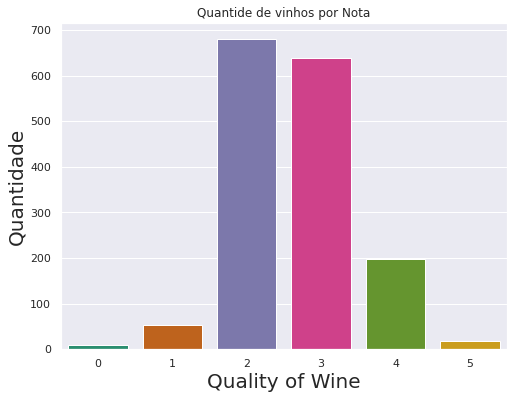

In [36]:
ax = sns.countplot(y)

ax.figure.set_size_inches(8,6)
ax.set_title('Quantide de vinhos por Nota')
ax.set_xlabel('Quality of Wine', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=20);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


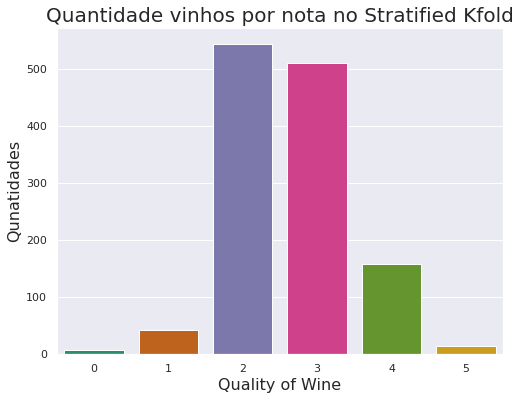

In [37]:
ax = sns.countplot(y.loc[list(s_kf.split(X, y))[0][0]])

ax.figure.set_size_inches(8,6)
ax.set_title('Quantidade vinhos por nota no Stratified Kfold', fontsize=20)
ax.set_xlabel('Quality of Wine', fontsize=16)
ax.set_ylabel('Qunatidades', fontsize=16);

Como podemos ver, o `Stratified_kfold()` separa os dados na mesma proporção que o dataframe original, o que é muito bom pois permite que sejam alcançados resultados melhores e evita que, em data set que tenham dados 90%/10% sejam pegos somente o grupo de 90% para treino

## Hold out

Esse método é muito utilizado quando temos um grande números de dados, pois ai podemos guardar (hold-out) uma parte do dados para teste

## Séries Temporais

Quando trabalhamos com séries temporais, podemos usat qualquer tipo de Crossvalidation que quiser normalmente, exceto o `Stratified_kfold()`.

Se quiser usar o `Stratified_kfold()` temos que fazer um processo diferente, que  consiste em dividir o dataset em Bins.

Para isso, podemos fazer de uma forma aletatória ou usarmos a fórmula geral para saber a quantidade de bins para cada dataset


### Exemplo

#### Criando uma série temporal

In [38]:
from sklearn import datasets

In [39]:
X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

In [50]:
df = pd.DataFrame(X, columns=[f'f_{i}' for i in range(X.shape[1])])

df['target'] = y

df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,target
0,3.427140,-0.058386,0.573730,0.924850,2.837478,-0.606550,1.827095,0.291231,2.215053,1.587450,-1.102045,0.790599,-0.071413,0.670202,-0.146027,-0.710657,1.264826,0.264290,0.016858,-0.279404,-0.539760,-0.118703,-0.188340,0.684100,-0.737629,0.715157,1.461586,0.493625,1.532730,0.217573,-0.101923,-0.533102,-1.043359,0.906228,-0.405714,-0.064734,0.487397,0.064588,0.073327,-0.848745,...,1.354783,-0.325103,-1.133120,2.322587,-0.732590,0.221558,0.011778,1.174586,-0.047695,1.535092,-1.038007,-1.326292,0.514452,-1.768268,1.227913,-0.103323,0.433617,0.525257,0.833751,-0.743972,-1.074724,1.585037,-0.507791,-0.412714,-0.210535,1.182693,0.253140,-0.064761,-1.644190,-0.228657,-1.064400,1.572857,0.829900,1.004410,0.328453,0.812224,1.098635,0.666274,NaN,11
1,0.511507,1.491514,1.455051,0.136514,-0.757213,1.645679,1.137499,0.174703,-1.787171,1.442409,-1.337627,1.505784,0.385729,1.848304,-0.074210,1.071455,-0.937630,-0.176939,-1.705226,-0.994082,0.769266,0.145689,0.599521,1.653386,0.136767,-0.133043,-0.195754,0.577463,-2.052647,1.521274,0.261802,-0.457692,1.200544,-0.120438,0.994668,1.560244,0.351599,0.504281,0.016481,0.606233,...,0.808171,0.442858,-0.168099,-0.886581,-0.209051,-0.025853,2.231726,-1.356424,-0.811864,-0.150208,-1.219987,-0.805827,0.623110,0.210219,-2.375857,-0.824674,1.500126,0.832109,0.451580,0.664706,2.117675,0.352894,0.613456,0.169044,-0.164271,0.866482,-0.372679,-0.107592,-0.447446,1.501064,0.477313,1.094504,-0.928369,-0.966895,-2.367376,1.239677,-0.077899,-0.530364,NaN,7
2,0.129024,1.482344,0.092512,1.258591,-1.306915,0.628852,-1.736577,0.975412,2.076713,0.368951,-0.972697,-1.188561,0.765513,-0.666861,-0.302302,0.105207,-0.396959,0.105569,-2.037459,0.157979,1.053518,1.458879,0.699634,1.108376,-0.089389,1.408961,-2.415282,-1.235876,-0.530694,0.851820,1.473003,-0.329193,0.746447,2.148383,-0.948033,0.577120,-0.726919,-0.150675,0.391319,-1.049272,...,1.401694,0.255775,-0.371829,-0.254528,-2.493886,-0.461646,-0.838257,0.784523,-0.352398,0.559040,0.320416,0.138338,0.083847,0.334928,-0.579644,-0.565759,0.507590,1.025547,-0.932089,0.103927,-0.122604,1.103405,0.223923,1.406551,1.414811,0.008249,-0.758998,-0.464813,1.193797,0.429189,-1.144918,-0.441812,-0.827083,0.570306,2.157316,-1.066348,0.678995,0.713780,NaN,7
3,1.009932,1.426511,0.533161,1.327355,0.276059,1.233156,-1.107496,-1.011879,-0.308639,-0.340353,0.444250,-0.089498,0.027695,-0.501742,-0.849186,1.337443,-0.035191,0.264761,-0.432341,-0.041687,-0.694119,0.819538,-0.788828,0.612142,-0.799574,0.443360,-0.346320,1.596719,-0.547945,0.931190,-0.409152,-1.657818,0.736343,1.023905,0.304113,-0.774623,1.398780,0.133566,0.767382,0.719431,...,0.338358,-0.113819,-0.154703,0.196933,-1.245936,-0.329525,0.579998,-2.301648,-0.713253,0.086801,-0.005958,-0.237293,-1.181239,-0.497225,-0.029424,-1.932044,1.147825,0.624889,-1.090197,-1.199216,0.483607,-0.028733,-1.438766,-0.629153,-1.018223,-0.928157,2.171263,0.781784,0.959521,0.638128,-0.874020,-0.108358,-1.371773,0.122406,0.292056,-0.086526,-0.913214,1.288252,NaN,7
4,1.420614,0.523313,0.577140,0.040502,0.750543,0.373597,-1.553173,1.150413,0.971986,0.260147,0.705644,-1.270386,-0.957543,-0.165792,-0.256886,-1.310415,0.428018,1.430143,0.818623,-2.265353,-0.907685,-0.528372,-0.115757,-0.153313,0.020648,-0.966260,0.795436,-0.512626,1.466519,0.681619,-0.796289,-0.911928,-0.792245,-0.745700,-0.648822,0.544192,-0.539153,-0.228427,0.326308,-1.890709,...,-0.681827,-0.835061,-0.797774,-1.291821,0.532211,-1.469674,0.358811,-0.589577,0.841814,0.826837,-2.180271,-0.168496,0.737104,-0.936968,-1.110019,0.440996,-0.113077,0.888099,0.107871,0.857790,0.600746,-1.392102,0.8364

#### Criando os folds

In [41]:
import pandas as pd
import numpy as np
from sklearn import model_selection

Da mesma forma que nos exemplos anteriores, vamos criar uma coluna `s_kfold` e inicia-la com o valor -1

In [42]:
df['s_kfold'] = -1

##### Calculando e separando os bins

Usando a fórmula geral para calcular o número apropriado de bins

In [43]:
num_bins = np.floor(1 + np.log2(len(df)))

num_bins

14.0

Redefinindo o DataFrame com a separação por bins usando o método `cut()`

In [44]:
# Ao usar labels=False o metodo cut devolve um inteiro que representa cada classe
# Caso não fosse passado nada, os valores seriam os intervalos que se encontram aquela entrada
df['classe'] = pd.cut(df.target, bins=int(num_bins), labels=False)

df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,s_kfold,classe
0,3.427140,-0.058386,0.573730,0.924850,2.837478,-0.606550,1.827095,0.291231,2.215053,1.587450,-1.102045,0.790599,-0.071413,0.670202,-0.146027,-0.710657,1.264826,0.264290,0.016858,-0.279404,-0.539760,-0.118703,-0.188340,0.684100,-0.737629,0.715157,1.461586,0.493625,1.532730,0.217573,-0.101923,-0.533102,-1.043359,0.906228,-0.405714,-0.064734,0.487397,0.064588,0.073327,-0.848745,...,-0.325103,-1.133120,2.322587,-0.732590,0.221558,0.011778,1.174586,-0.047695,1.535092,-1.038007,-1.326292,0.514452,-1.768268,1.227913,-0.103323,0.433617,0.525257,0.833751,-0.743972,-1.074724,1.585037,-0.507791,-0.412714,-0.210535,1.182693,0.253140,-0.064761,-1.644190,-0.228657,-1.064400,1.572857,0.829900,1.004410,0.328453,0.812224,1.098635,0.666274,460.260003,-1,11
1,0.511507,1.491514,1.455051,0.136514,-0.757213,1.645679,1.137499,0.174703,-1.787171,1.442409,-1.337627,1.505784,0.385729,1.848304,-0.074210,1.071455,-0.937630,-0.176939,-1.705226,-0.994082,0.769266,0.145689,0.599521,1.653386,0.136767,-0.133043,-0.195754,0.577463,-2.052647,1.521274,0.261802,-0.457692,1.200544,-0.120438,0.994668,1.560244,0.351599,0.504281,0.016481,0.606233,...,0.442858,-0.168099,-0.886581,-0.209051,-0.025853,2.231726,-1.356424,-0.811864,-0.150208,-1.219987,-0.805827,0.623110,0.210219,-2.375857,-0.824674,1.500126,0.832109,0.451580,0.664706,2.117675,0.352894,0.613456,0.169044,-0.164271,0.866482,-0.372679,-0.107592,-0.447446,1.501064,0.477313,1.094504,-0.928369,-0.966895,-2.367376,1.239677,-0.077899,-0.530364,-34.442859,-1,7
2,0.129024,1.482344,0.092512,1.258591,-1.306915,0.628852,-1.736577,0.975412,2.076713,0.368951,-0.972697,-1.188561,0.765513,-0.666861,-0.302302,0.105207,-0.396959,0.105569,-2.037459,0.157979,1.053518,1.458879,0.699634,1.108376,-0.089389,1.408961,-2.415282,-1.235876,-0.530694,0.851820,1.473003,-0.329193,0.746447,2.148383,-0.948033,0.577120,-0.726919,-0.150675,0.391319,-1.049272,...,0.255775,-0.371829,-0.254528,-2.493886,-0.461646,-0.838257,0.784523,-0.352398,0.559040,0.320416,0.138338,0.083847,0.334928,-0.579644,-0.565759,0.507590,1.025547,-0.932089,0.103927,-0.122604,1.103405,0.223923,1.406551,1.414811,0.008249,-0.758998,-0.464813,1.193797,0.429189,-1.144918,-0.441812,-0.827083,0.570306,2.157316,-1.066348,0.678995,0.713780,-12.329633,-1,7
3,1.009932,1.426511,0.533161,1.327355,0.276059,1.233156,-1.107496,-1.011879,-0.308639,-0.340353,0.444250,-0.089498,0.027695,-0.501742,-0.849186,1.337443,-0.035191,0.264761,-0.432341,-0.041687,-0.694119,0.819538,-0.788828,0.612142,-0.799574,0.443360,-0.346320,1.596719,-0.547945,0.931190,-0.409152,-1.657818,0.736343,1.023905,0.304113,-0.774623,1.398780,0.133566,0.767382,0.719431,...,-0.113819,-0.154703,0.196933,-1.245936,-0.329525,0.579998,-2.301648,-0.713253,0.086801,-0.005958,-0.237293,-1.181239,-0.497225,-0.029424,-1.932044,1.147825,0.624889,-1.090197,-1.199216,0.483607,-0.028733,-1.438766,-0.629153,-1.018223,-0.928157,2.171263,0.781784,0.959521,0.638128,-0.874020,-0.108358,-1.371773,0.122406,0.292056,-0.086526,-0.913214,1.288252,-40.225358,-1,7
4,1.420614,0.523313,0.577140,0.040502,0.750543,0.373597,-1.553173,1.150413,0.971986,0.260147,0.705644,-1.270386,-0.957543,-0.165792,-0.256886,-1.310415,0.428018,1.430143,0.818623,-2.265353,-0.907685,-0.528372,-0.115757,-0.153313,0.020648,-0.966260,0.795436,-0.512626,1.466519,0.681619,-0.796289,-0.911928,-0.792245,-0.745700,-0.648822,0.544192,-0.539153,-0.228427,0.326308,-1.890709,...,-0.835061,-0.797774,-1.291821,0.532211,-1.469674,0.358811,-0.589577,0.841814,0.826837,-2.180271,-0.168496,0.737104,-0.936968,-1.110019,0.440996,-0.113077,0.888099,0.107871,0.857790,0.600746,-1.392102,0.836484

Criando os Stratifeid KFolds

In [45]:
skf = model_selection.StratifiedKFold(n_splits=5)

Separando os dados em X e y

In [46]:
X = df.drop(['target', 'classe'], axis=1)
y = df.classe

Adicionando a coluna `s_kfold` o grupo que o modelo separou para cada entrada

In [59]:
for fold, (trn_, val_) in enumerate(skf.split(X, y)):
  X.loc[val_, 's_kfold'] = fold

Exibindo a proporção em que os dados foram separados, de acordo com as classes:

In [54]:
for i in range(5):
  dtrn_s_kfold = list(s_kf.split(X, y))[i][0]
  print(y.loc[dtrn_s_kfold].value_counts().sort_index().to_list());

[2, 5, 32, 173, 557, 1405, 2363, 2928, 2464, 1340, 552, 145, 29, 5]
[2, 5, 32, 173, 557, 1405, 2363, 2928, 2464, 1339, 553, 145, 29, 5]
[2, 4, 32, 172, 558, 1404, 2364, 2928, 2464, 1339, 553, 146, 29, 5]
[1, 5, 32, 173, 558, 1405, 2363, 2928, 2464, 1339, 553, 146, 29, 4]
[1, 5, 32, 173, 558, 1405, 2363, 2928, 2464, 1339, 553, 146, 28, 5]


Comparando com a proporção do DataFrame completo

In [55]:
y.value_counts().sort_index().to_list()

[2, 6, 40, 216, 697, 1756, 2954, 3660, 3080, 1674, 691, 182, 36, 6]

Facilitando a visulização dessa proporção com um gráfico:

DataFrame original

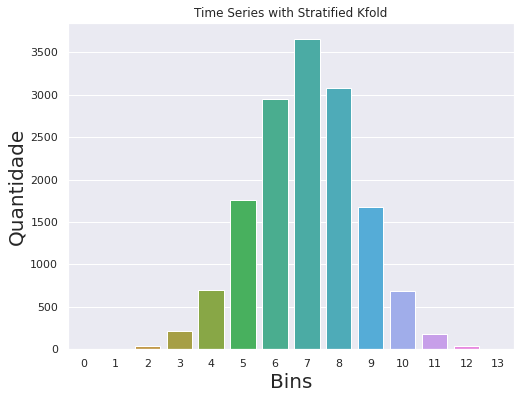

In [57]:
ax = sns.countplot(y)

ax.figure.set_size_inches(8,6)
ax.set_title('Time Series with Stratified Kfold')
ax.set_xlabel('Bins', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=20);

Escolhendo um dos folds para fazer o plot:

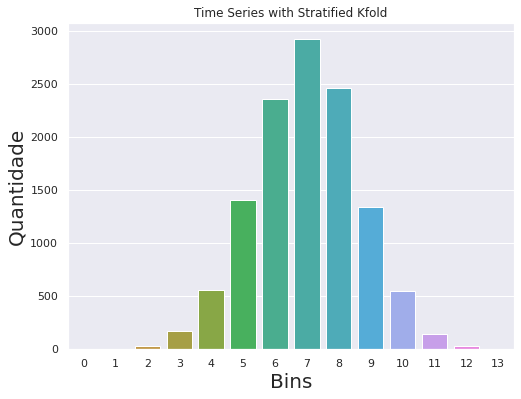

In [58]:
ax = sns.countplot(y.loc[list(s_kf.split(X, y))[0][0]])

ax.figure.set_size_inches(8,6)
ax.set_title('Time Series with Stratified Kfold')
ax.set_xlabel('Bins', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=20);

Mais uma vez, podemos visualizar que o Stratified Kfolf toma cuidado para separar os grupos de treino e validação na mesma proporção que o DataSet original